In [1]:
import random
import functools
max_size = 1000
max_n = 1000
count = 0

def generateRandomList(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]

unsorted = generateRandomList(max_size, max_n)
control = unsorted.copy()

if unsorted == control:
	print("The control and unsorted are the same")

def merge(arr,left, right):
    global count
    i = j = k = 0
    while i < len(left) and j < len(right):
        count+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global count
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            count+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

count=0
S = 10
sorted_list = hybrid_sort(unsorted,10)
control = sorted(control)

# check that algo is correct

if functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q,sorted_list,control), True):
    print ("The control and sorted are the same")

print("Number of comparisons: {}".format(count))
print(sorted_list[:100])
print(control[:100])

The control and unsorted are the same
The control and sorted are the same
Number of comparisons: 8487
[1, 6, 7, 9, 12, 12, 15, 18, 19, 20, 21, 21, 22, 22, 22, 22, 23, 24, 24, 26, 26, 31, 31, 34, 37, 38, 39, 39, 39, 39, 39, 41, 42, 42, 44, 46, 48, 48, 48, 49, 49, 49, 51, 54, 54, 54, 56, 56, 57, 58, 59, 62, 63, 63, 63, 64, 66, 70, 71, 71, 72, 72, 73, 73, 75, 78, 79, 80, 81, 82, 83, 83, 85, 86, 87, 87, 88, 91, 92, 93, 93, 94, 95, 95, 96, 100, 100, 102, 104, 106, 108, 109, 109, 112, 113, 114, 116, 119, 120, 121]
[1, 6, 7, 9, 12, 12, 15, 18, 19, 20, 21, 21, 22, 22, 22, 22, 23, 24, 24, 26, 26, 31, 31, 34, 37, 38, 39, 39, 39, 39, 39, 41, 42, 42, 44, 46, 48, 48, 48, 49, 49, 49, 51, 54, 54, 54, 56, 56, 57, 58, 59, 62, 63, 63, 63, 64, 66, 70, 71, 71, 72, 72, 73, 73, 75, 78, 79, 80, 81, 82, 83, 83, 85, 86, 87, 87, 88, 91, 92, 93, 93, 94, 95, 95, 96, 100, 100, 102, 104, 106, 108, 109, 109, 112, 113, 114, 116, 119, 120, 121]


Intersection: 0 Number of times: 200
Intersection: 1 Number of times: 16
Intersection: 2 Number of times: 32
Intersection: 4 Number of times: 11
Intersection: 5 Number of times: 15
Intersection: 7 Number of times: 21
Intersection: 9 Number of times: 8
Intersection: 12 Number of times: 16
Intersection: 13 Number of times: 6
Intersection: 15 Number of times: 4
Intersection: 17 Number of times: 2
Intersection: 20 Number of times: 2
Intersection: 22 Number of times: 2


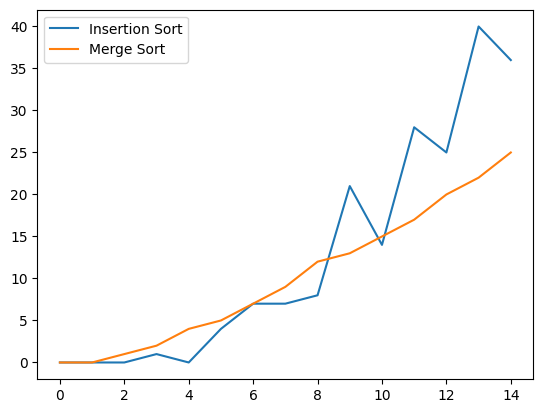

In [2]:
import matplotlib.pyplot as plt
import collections

def insertion_sort(arr):
    count = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            count+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return count

countMerge = 0
def merge(arr,left, right):
    global countMerge
    i = j = k = 0
    while i < len(left) and j < len(right):
        countMerge+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

hashTable = {}

for i in range(100):
    testArrays = []
    for size in range(15):
        testArrays.append(generateRandomList(size, size))

    keyComparisonsInsert = []
    keyComparisonsMerge = []

    for arr in testArrays:
        countInsert = insertion_sort(arr)
        mergeSort(arr)
        keyComparisonsInsert.append(countInsert)
        countInsert=0
        keyComparisonsMerge.append(countMerge)
        countMerge=0

    for i in range(15):
        if keyComparisonsInsert[i] == keyComparisonsMerge[i]:
            hashTable[keyComparisonsInsert[i]] = hashTable.get(keyComparisonsInsert[i], 0) + 1

od = collections.OrderedDict(sorted(hashTable.items()))
for key in od:
    print("Intersection: {} Number of times: {}".format(key, od[key]))

plt.plot(keyComparisonsInsert, label="Insertion Sort")
plt.plot(keyComparisonsMerge, label="Merge Sort")
plt.legend()
plt.show()

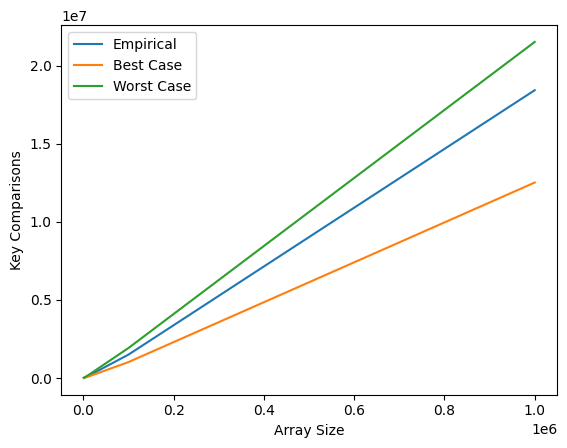

In [4]:
import numpy as np
hybridCount = 0

def merge(arr,left, right):
    global hybridCount
    i = j = k = 0
    while i < len(left) and j < len(right):
        hybridCount+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global hybridCount
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybridCount+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

keyComparisonsHybrid = []
testArrays = []
sizes = [1000, 10000, 100000, 1000000]
best_case = np.array(sizes) + np.array(sizes) * np.log(np.array(sizes)/S)
worst_case = np.array(sizes) * S + np.array(sizes) * np.log(np.array(sizes)/S)

for size in sizes:
    testArrays.append(generateRandomList(size, size))

for arr in testArrays:
    hybrid_sort(arr, 10)
    keyComparisonsHybrid.append(hybridCount)
    hybridCount=0

plt.plot(sizes,keyComparisonsHybrid, label="Empirical")
plt.plot(sizes, best_case, label='Best Case')
plt.plot(sizes, worst_case, label='Worst Case')
plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.legend()
plt.show()

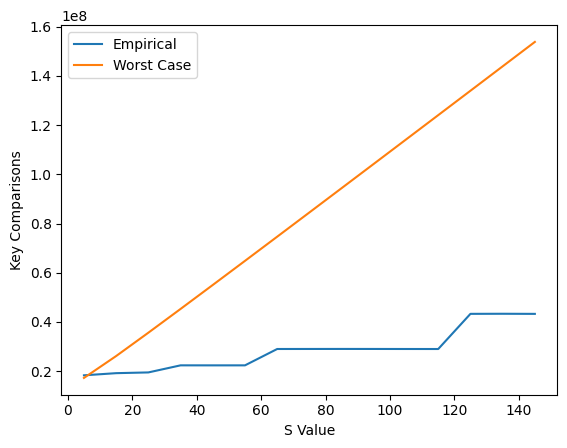

In [10]:
import numpy as np
hybridCount = 0

def merge(arr,left, right):
    global hybridCount
    i = j = k = 0
    while i < len(left) and j < len(right):
        hybridCount+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global hybridCount
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybridCount+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

keyComparisonsHybrid = []
best = []
worst = []
size = 1000000

# list containing integers from 0 to 150, at 50 intervals
sValues = [i for i in range(5, 150, 10)]


for s in sValues:
    best_case = np.array(size) + np.array(size) * np.log(np.array(size)/s)
    worst_case = np.array(size) * s + np.array(size) * np.log(np.array(size)/s)
    best.append(best_case)
    worst.append(worst_case)
    arr = generateRandomList(size, size)
    hybrid_sort(arr, s)
    keyComparisonsHybrid.append(hybridCount)
    hybridCount=0

plt.plot(sValues,keyComparisonsHybrid, label="Empirical")
plt.plot(sValues, worst, label='Worst Case')
plt.xlabel('S Value')
plt.ylabel('Key Comparisons')
plt.legend()
plt.show()

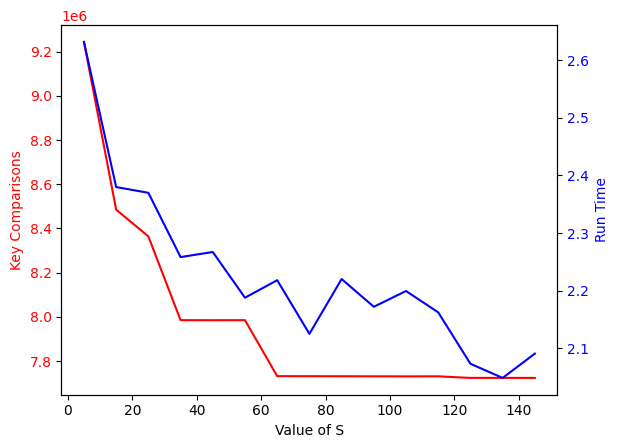

In [15]:

import time
hybridCount = 0

def merge(arr,left, right):
    global hybridCount
    i = j = k = 0
    while i < len(left) and j < len(right):
        hybridCount+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global hybridCount
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybridCount+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

keyComparisonsHybrid = []
runTimes =[]
size = 1000000

# list containing integers from 0 to 150, at 50 intervals
sValues = [i for i in range(2, 100, 4)]


for s in sValues:
    exec_time = 0
    hybridCount = 0
    for i in range(30):
        arr = generateRandomList(size, size)
        start_time = time.time()
        hybrid_sort(arr, s)
        end_time = time.time()
        exec_time += (end_time - start_time)
    
    keyComparisonsHybrid.append(hybridCount/30)
    runTimes.append(exec_time/30)

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Value of S') 
ax1.set_ylabel('Key Comparisons', color = 'red') 
ax1.plot(sValues, keyComparisonsHybrid, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
  
ax2.set_ylabel('Run Time', color = 'blue') 
ax2.plot(sValues, runTimes, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')

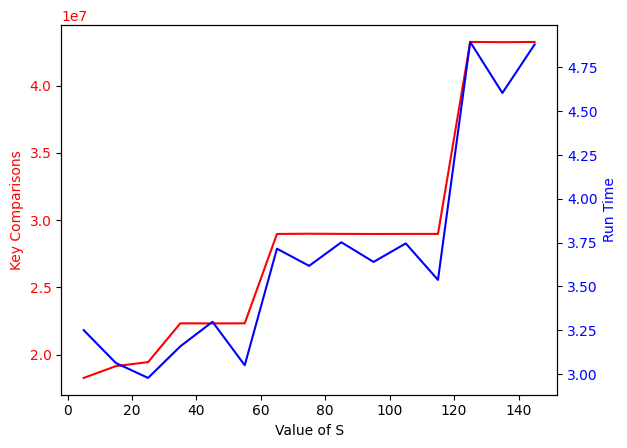

In [13]:

import time
hybridCount = 0

def merge(arr,left, right):
    global hybridCount
    i = j = k = 0
    while i < len(left) and j < len(right):
        hybridCount+=1
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return arr

def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    left = mergeSort(left)
    right = mergeSort(right)
    return merge(arr, left, right)

def insertion_sort(arr):
    global hybridCount
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            hybridCount+=1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def hybrid_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    hybrid_sort(left, s)
    hybrid_sort(right, s)
    return merge(arr,left,right)

keyComparisonsHybrid = []
runTimes =[]
size = 1000000

# list containing integers from 0 to 150, at 50 intervals
sValues = [i for i in range(5, 150, 10)]


for s in sValues:
    arr = generateRandomList(size, size)
    exec_time = 0
    hybridCount = 0
    start_time = time.time()
    hybrid_sort(arr, s)
    end_time = time.time()
    exec_time = (end_time - start_time)
    
    keyComparisonsHybrid.append(hybridCount)
    runTimes.append(exec_time)

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Value of S') 
ax1.set_ylabel('Key Comparisons', color = 'red') 
ax1.plot(sValues, keyComparisonsHybrid, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
  
ax2.set_ylabel('Run Time', color = 'blue') 
ax2.plot(sValues, runTimes, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')